In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import thermo
from profiles import *
import utils

In [8]:
# Directories

dirs = ['/vol0500/data/hp240116/fredrik/deep-botany/run_1-singlenode',
        '/vol0500/data/hp240116/fredrik/deep-botany/run_1-singlenode-lmostlocal-false',
        '/vol0500/data/hp240116/fredrik/deep-botany/run_1-small',
        '/vol0500/data/hp240116/fredrik/deep-botany/ensemble-1536/run_1',
       ]
labs = ['bsl', 'mostlocal-false', 'small', '1536']

member=xr.DataArray(data=labs, coords={'member':np.array(labs)})

In [9]:
tmsers = [dirs[i]+'/tmser.001.nc' for i in range(len(dirs))]
ds_tm = xr.open_mfdataset(tmsers, combine='nested', concat_dim=member)
ds_tm

<xarray.Dataset> Size: 66kB
Dimensions:  (time: 96, member: 4)
Coordinates:
  * time     (time) datetime64[ns] 768B 2024-08-01T00:30:00 ... 2024-08-03
  * member   (member) <U15 240B 'bsl' 'mostlocal-false' 'small' '1536'
Data variables: (12/42)
    cfrac    (member, time) float32 2kB dask.array<chunksize=(1, 96), meta=np.ndarray>
    zb       (member, time) float32 2kB dask.array<chunksize=(1, 96), meta=np.ndarray>
    zc_av    (member, time) float32 2kB dask.array<chunksize=(1, 96), meta=np.ndarray>
    zc_max   (member, time) float32 2kB dask.array<chunksize=(1, 96), meta=np.ndarray>
    zi       (member, time) float32 2kB dask.array<chunksize=(1, 96), meta=np.ndarray>
    we       (member, time) float32 2kB dask.array<chunksize=(1, 96), meta=np.ndarray>
    ...       ...
    rsdtm    (member, time) float32 2kB dask.array<chunksize=(1, 96), meta=np.ndarray>
    rldtm    (member, time) float32 2kB dask.array<chunksize=(1, 96), meta=np.ndarray>
    rsutm    (member, time) float32 2kB dask.array<chunksize=(1, 96), meta=np.ndarray>
    rlutm    (member, time) float32 2kB dask.array<chunksize=(1, 96), meta=np.ndarray>
    rsutmcs  (member, time) float32 2kB dask.array<chunksize=(1, 96), meta=np.ndarray>
    rlutmcs  (member, time) float32 2kB dask.array<chunksize=(1, 96), meta=np.ndarray>
Attributes:
    title:    tmser.001.nc
    history:  Created on 20250210 at 190642.466
    Source:   DALES 4.4.2 git: v4.4.1-735-g6ba1fc
    Author:

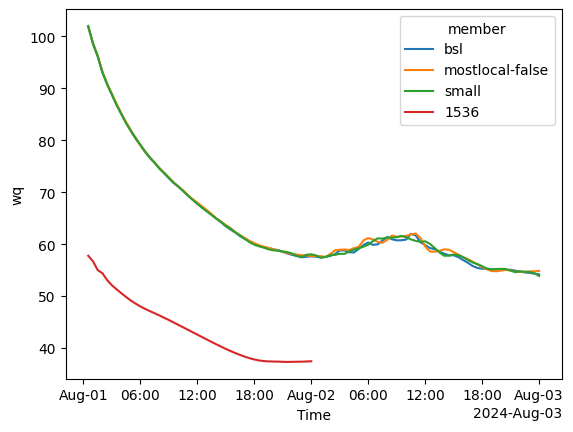

In [11]:
# Surface fluxes
cp=1004.
rho=1.225
Lv = 2.5e6

fig=plt.figure(); ax = plt.gca()
# (cp*rho*ds_tm['wtheta']).plot.line(x='time', ax=ax, add_legend=False)
(Lv*ds_tm['wq']).plot.line(x='time', ax=ax)